In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import scipy.optimize as opt
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb
from sklearn.linear_model import LinearRegression
#plt.style.use('ggplot')

my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

In [2]:
a = 3; b = 3;

m = 10
a LSE = 0.48706319560716366 a Theil = 0.20839083496496022
b LSE = 3.9503852518480507 b Theil = 4.192716197774582
sigma LSE = RSS / m = 0.4522900405676934
sigma Theil = RSS / m = 0.4664966672107532


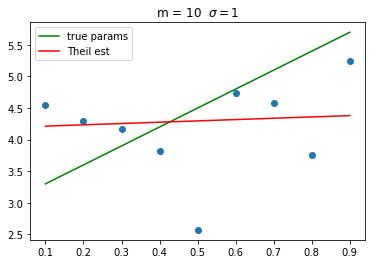

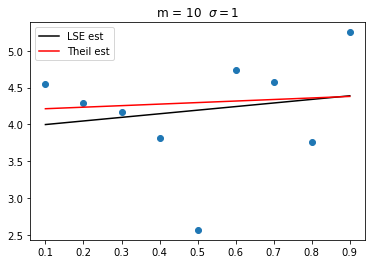

m = 20
a LSE = 1.8111815478941786 a Theil = 1.6628858372325455
b LSE = 3.3613388655261027 b Theil = 3.2659738760089976
sigma LSE = RSS / m = 0.8584046572511161
sigma Theil = RSS / m = 0.8872694343594251


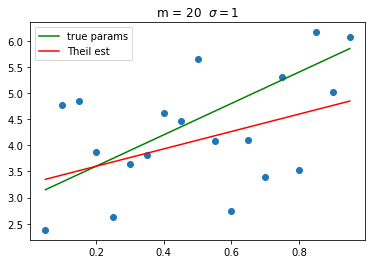

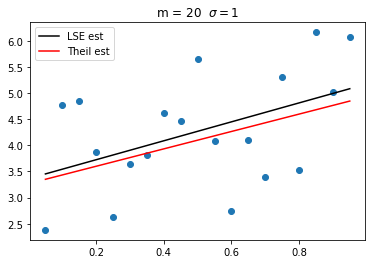

m = 50
a LSE = 1.8857072164839326 a Theil = 1.906288969322686
b LSE = 3.6142731033666013 b Theil = 3.58661046920452
sigma LSE = RSS / m = 0.6204498275762489
sigma Theil = RSS / m = 0.620778780894292


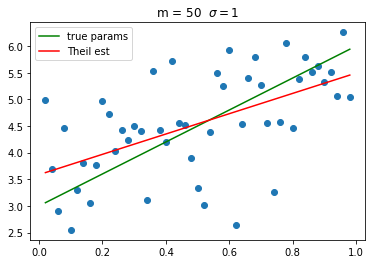

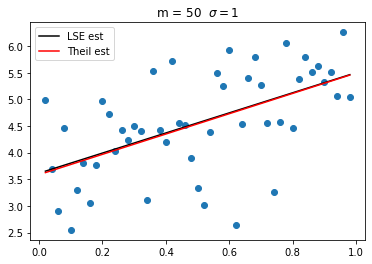

In [14]:
a = 3; b = 3;
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1, step = 1 / m0)
    ys = np.array([a * elem + b + my_norm(0, 1).rvs() for elem in xs])
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ' + str(np.linalg.norm(ys - X@[LSEa, LSEb]) ** 2 / m0))
    print('sigma Theil = RSS / m = ' + str(np.linalg.norm(ys - X@[Theila, Theilb]) ** 2 / m0))
    
    plt.scatter(xs, ys)
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()

$RSS = || (y - Xa)||^2 $

m = 10
a LSE = 2.450103938989622 a Theil = 2.3341917124839
b LSE = 3.47313912093962 b Theil = 3.159094493700417
sigma LSE = RSS / m = 0.16853759986788086
sigma Theil = RSS / m = 0.2938898343570715


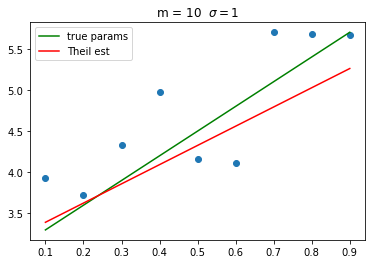

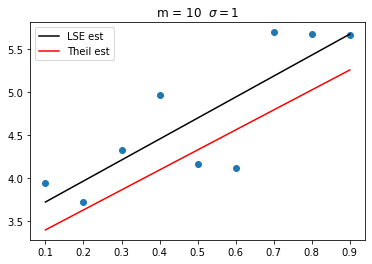

m = 20
a LSE = 3.618760668759947 a Theil = 3.7941785858194894
b LSE = 2.7680333420448386 b Theil = 2.5701492217846953
sigma LSE = RSS / m = 0.25726615207714026
sigma Theil = RSS / m = 0.2709902555271555


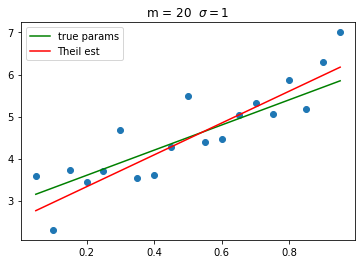

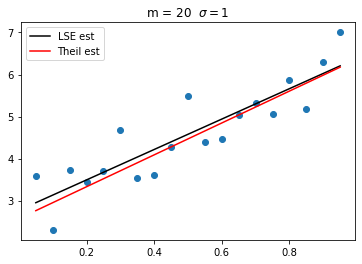

m = 50
a LSE = 2.8170310359546673 a Theil = 2.8860082242430485
b LSE = 3.0964832345518474 b Theil = 3.2073907688399896
sigma LSE = RSS / m = 0.3472462475431828
sigma Theil = RSS / m = 0.3683364966593593


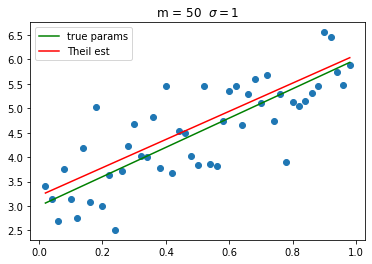

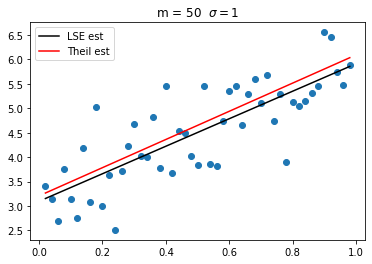

In [17]:
a = 3; b = 3;
for m0 in [10, 20, 50]:
    xs = np.arange(1 / m0, 1, step = 1 / m0)
    ys = np.array([a * elem + b + my_norm(0, a/9).rvs() for elem in xs])
    X = np.array([ [elem, 1] for elem in xs])
    LSEresult = LinearRegression().fit(X, ys)
    LSEa = LSEresult.coef_[0]
    LSEb = LSEresult.intercept_
    
    Theilres = stat.theilslopes(ys, xs)
    Theila = Theilres[0]; Theilb = Theilres[1]
    
    print('m =', m0)
    print('a LSE =', LSEa, 'a Theil =', Theila)
    print('b LSE =', LSEb, 'b Theil =', Theilb)
    print('sigma LSE = RSS / m = ' + str(np.linalg.norm(ys - X@[LSEa, LSEb]) ** 2 / m0))
    print('sigma Theil = RSS / m = ' + str(np.linalg.norm(ys - X@[Theila, Theilb]) ** 2 / m0))
    
    plt.scatter(xs, ys)
    plt.plot(xs, [a * elem + b for elem in xs] , label = 'true params', color = 'green')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()
    
    plt.scatter(xs, ys)
    plt.plot(xs, [LSEa * elem + LSEb for elem in xs] , label = 'LSE est', color = 'black')
    plt.plot(xs, [Theila * elem + Theilb for elem in xs] , label = 'Theil est', color = 'red')
    
    plt.legend()
    plt.title('m = ' + str(m0) + '  $\\sigma = 1$')
    plt.show()